### Important Library :

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading dataset:

In [27]:
df = pd.read_csv(r'D:\Github\Stock_Market_Performance_Analysis_(NIFTY500)_using_Python\NIFTY_500\nifty_500.csv')

### Display first few rows:


In [32]:
print(display(df.head(10)))


,Company Name,Symbol,Industry,Series,Open,High,Low,Previous Close,Last Traded Price,Change,Percentage Change,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low,365 Day Percentage Change,30 Day Percentage Change
0,3M India Ltd.,3MINDIA,Diversified,EQ,21950.00,21999.00,21126.05,21854.05,21575.00,-279.05,-1.28,4159,8.965357e+07,27800.00,17273.00,-10.18,8.22
1,Aarti Drugs Ltd.,AARTIDRUGS,Healthcare,EQ,400.50,401.80,394.10,403.85,400.00,-3.85,-0.95,31782,1.262731e+07,749.75,378.00,-42.92,-5.10
2,Aavas Financiers Ltd.,AAVAS,Financial Services,EQ,1997.10,2004.05,1894.50,2015.45,1943.15,-72.30,-3.59,150704,2.907728e+08,3340.00,1815.00,-25.69,-9.39
3,ABB India Ltd.,ABB,Capital Goods,EQ,2260.35,2311.50,2260.35,2300.90,2280.00,-20.90,-0.91,97053,2.210935e+08,2487.85,1618.05,27.25,-5.21
4,Abbott India Ltd.,ABBOTINDIA,Healthcare,EQ,18700.40,19200.00,18605.00,18760.40,19199.80,439.40,2.34,12396,2.346770e+08,23934.45,15514.00,11.61,5.84
5,Aditya Birla Capital Ltd.,ABCAPITAL,Financial Services,EQ,89.00,90.60,88.35,89.40,90.25,0.85,0.95,2401323,2.151826e+08,139.20,85.60,-23.75,-11.57
6,Aditya Birla Fashion and Retail Ltd.,ABFRL,Consumer Services,EQ,235.60,243.50,235.60,237.05,242.20,5.15,2.17,1014277,2.435482e+08,322.00,189.35,9.87,-12.62
7,Aditya Birla Sun Life AMC Ltd.,ABSLAMC,Financial Services,EQ,400.05,406.70,400.00,400.05,405.90,5.85,1.46,34489,1.390183e+07,722.90,375.00,-,-5.09
8,ACC Ltd.,ACC,Construction Materials,EQ,2122.95,2174.00,2122.95,2121.95,2171.70,49.75,2.34,284645,6.136206e+08,2589.00,1900.00,5.32,-3.48
9,Adani Enterprises Ltd.,ADANIENT,Metals & Mining,EQ,2189.90,2242.00,2138.25,2190.90,2229.25,38.35,1.75,2141743,4.695579e+09,2420.95,1332.75,45.33,1.08


None


### Checking Missing Value:

In [34]:
print(df.isnull().sum())

Company Name                 0
Symbol                       0
Industry                     0
Series                       0
Open                         0
High                         0
Low                          0
Previous Close               0
Last Traded Price            0
Change                       0
Percentage Change            0
Share Volume                 0
Value (Indian Rupee)         0
52 Week High                 0
52 Week Low                  0
365 Day Percentage Change    0
30 Day Percentage Change     0
dtype: int64


### Checking Data Type:

In [35]:
print(df.dtypes)

Company Name                  object
Symbol                        object
Industry                      object
Series                        object
Open                         float64
High                         float64
Low                          float64
Previous Close               float64
Last Traded Price            float64
Change                        object
Percentage Change             object
Share Volume                   int64
Value (Indian Rupee)         float64
52 Week High                 float64
52 Week Low                  float64
365 Day Percentage Change     object
30 Day Percentage Change      object
dtype: object


### Summary Statistic For numarical Columns:

In [37]:
print(display(df.describe()))

,Open,High,Low,Previous Close,Last Traded Price,Share Volume,Value (Indian Rupee),52 Week High,52 Week Low
count,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02,5.010000e+02,501.000000,501.000000
mean,1525.904491,1553.804990,1504.042415,1528.061277,1536.925449,2.580350e+06,8.635146e+08,2182.632196,1281.628982
std,4466.627117,4576.377692,4435.492332,4477.209376,4532.004734,9.407021e+06,4.335973e+09,5728.930152,3850.529646
min,6.750000,6.950000,6.700000,6.850000,6.800000,1.507000e+03,2.587223e+06,13.100000,4.550000
25%,215.300000,221.550000,210.600000,217.200000,214.650000,7.740500e+04,4.502265e+07,328.700000,166.800000
50%,551.100000,569.100000,547.000000,554.750000,563.000000,3.296100e+05,1.533133e+08,818.000000,438.050000
75%,1404.500000,1421.250000,1396.850000,1411.700000,1410.000000,1.235612e+06,6.644570e+08,2096.750000,1128.800000
max,70300.000000,72500.000000,70300.000000,70800.900000,71900.000000,1.257883e+08,9.211987e+10,87550.000000,63000.000000


None


### Plot Histgram for Numarical columns:

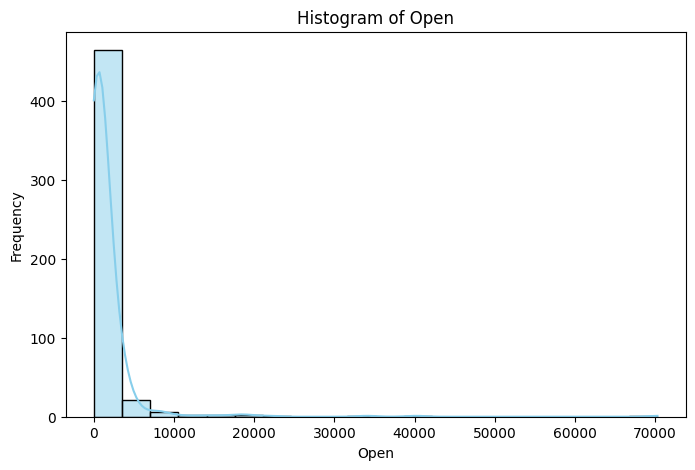

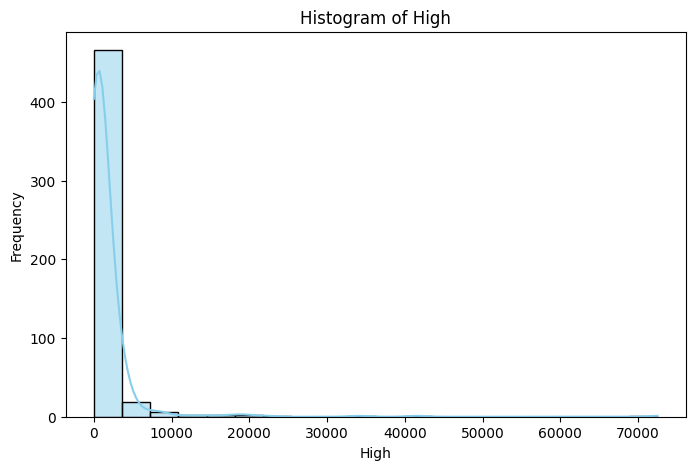

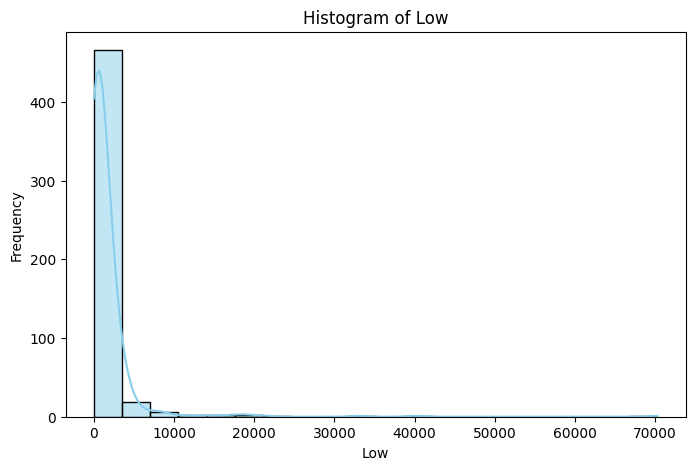

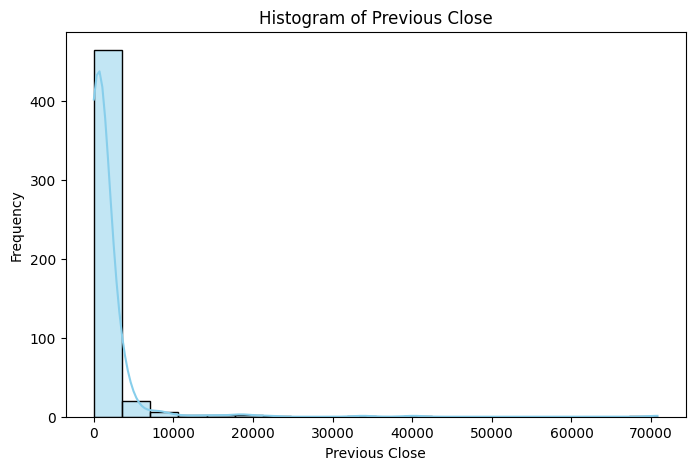

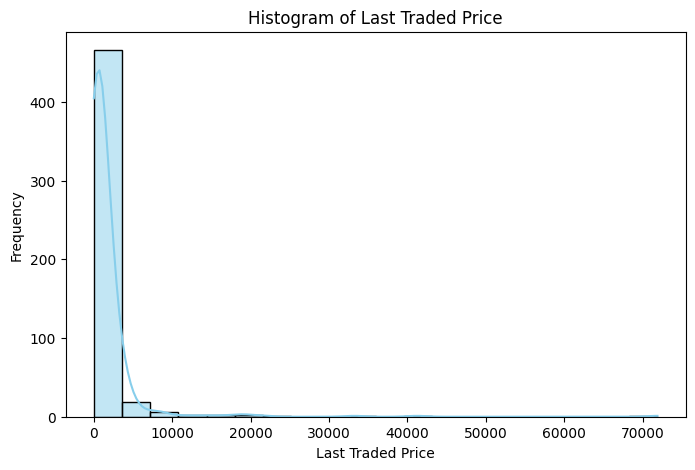

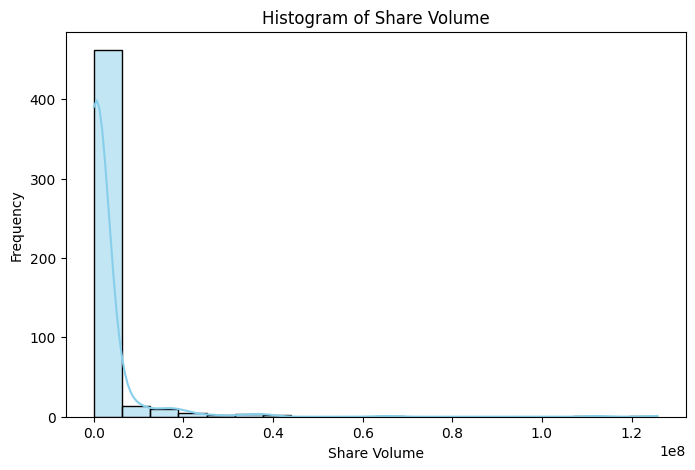

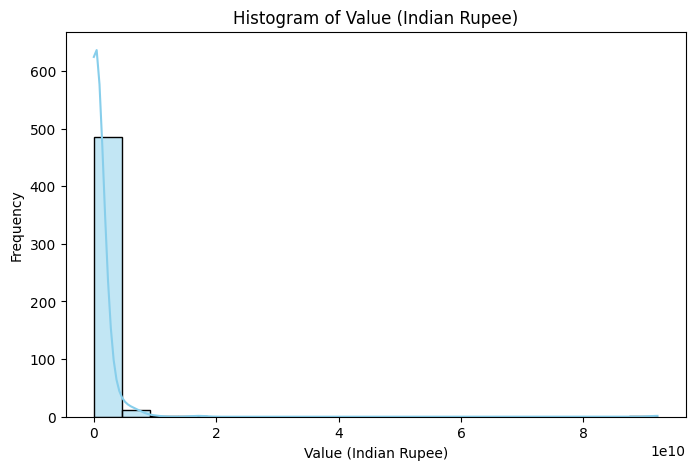

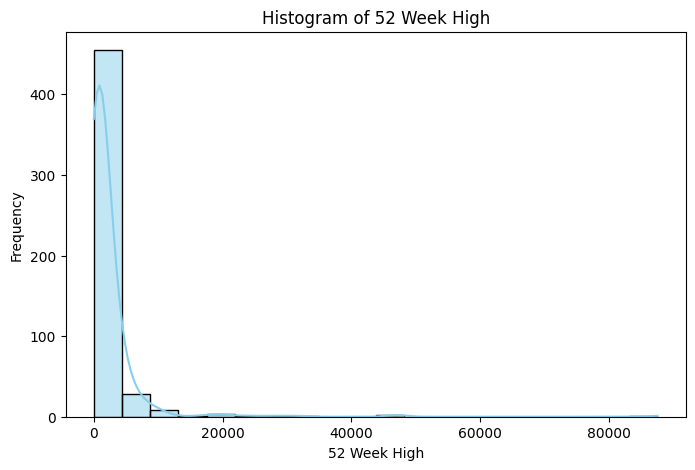

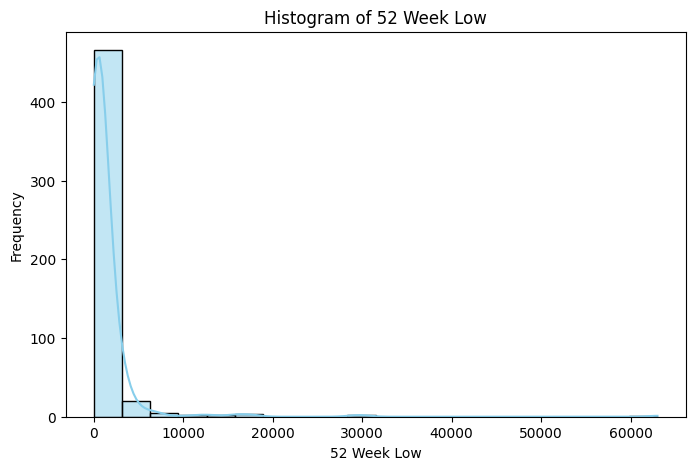

In [44]:
numerical_cols =["Open","High","Low", "Previous Close", "Last Traded Price", "Share Volume", "Value (Indian Rupee)", "52 Week High", "52 Week Low"]
for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], kde=True, bins=20, color='Skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()